# Question 5 (Homework 2)  

### Predicting number of COVID-19 cases in Ingham County, Michigan Using Multiple Linear Regression

For this problem, we are interested to predict the number of new coronavirus cases on a given day in Ingham county based on the number of cases in its previous 5 days. We will use the dataset obtained from https://www.michigan.gov/coronavirus/0,9753,7-406-98163_98173---,00.html (similar to lectures 2 and 4).

**Step 1:** Load the input data and select only the rows for confirmed cases in Ingham county.

In [1]:
import pandas as pd

data = pd.read_csv('michigan.csv', header='infer')
data = data[(data['COUNTY']=='Ingham') & (data['CASE_STATUS']=='Confirmed')]
print(data.shape)
data.head(10)

(187, 8)


,COUNTY,Date,CASE_STATUS,Cases,Deaths,Cases.Cumulative,Deaths.Cumulative,Updated
6358,Ingham,3/1/2020,Confirmed,0,0,0,0,2020/09/03 14:15:23
6359,Ingham,3/2/2020,Confirmed,1,0,1,0,2020/09/03 14:15:23
6360,Ingham,3/3/2020,Confirmed,1,0,2,0,2020/09/03 14:15:23
6361,Ingham,3/4/2020,Confirmed,1,0,3,0,2020/09/03 14:15:23
6362,Ingham,3/5/2020,Confirmed,0,0,3,0,2020/09/03 14:15:23
6363,Ingham,3/6/2020,Confirmed,0,0,3,0,2020/09/03 14:15:23
6364,Ingham,3/7/2020,Confirmed,0,0,3,0,2020/09/03 14:15:23
6365,Ingham,3/8/2020,Confirmed,1,0,4,0,2020/09/03 14:15:23
6366,Ingham,3/9/2020,Confirmed,1,0,5,0,2020/09/03 14:15:23
6367,Ingham,3/10/2020,Confirmed,3,0,8,0,2020/09/03 14:15:23


**Step 2:** Feature extraction. Create the target attribute (i.e., number of covid-19 cases) and predictor attribute (i.e., number of cases for each of the 5 previous days).

In [2]:
import numpy as np

t = data['Date'].values
y = data['Cases'].values
N = y.shape[0]
X = np.column_stack((y[4:N-1],y[3:N-2],y[2:N-3],y[1:N-4],y[:N-5]))
y = y[5:]
t = t[5:]
data = pd.DataFrame(np.column_stack((t,X,y)),columns=['Date','t-1',
                    't-2','t-3','t-4','t-5','Number of cases'])
data

,Date,t-1,t-2,t-3,t-4,t-5,Number of cases
0,3/6/2020,0,1,1,1,0,0
1,3/7/2020,0,0,1,1,1,0
2,3/8/2020,0,0,0,1,1,1
3,3/9/2020,1,0,0,0,1,1
4,3/10/2020,1,1,0,0,0,3
...,...,...,...,...,...,...,...
177,8/30/2020,11,12,11,8,7,13
178,8/31/2020,13,11,12,11,8,15
179,9/1/2020,15,13,11,12,11,17
180,9/2/2020,17,15,13,11,12,4


**Step 3:** Divide the data into training and test sets.

**Make sure you append a column of 1s** (as bias term) to the predictor attributes X before splitting the data into training and test sets. Use 67% (two-third) of the data for training and the remaining 33% (one-third) for testing. You should set the random_state parameter for train_test_split() function to 1.

In [9]:
from sklearn.model_selection import train_test_split

N = X.shape[0]
Xbias = np.column_stack((X,np.ones((N,1))))            # append a column of 1s to X
X_train, X_test, Y_train, Y_test = train_test_split( Xbias, y, test_size=0.33, random_state=1 )  # use Xbias, Y_train as input
print('Training set size for predictors:', X_train.shape)
print('Test set size for predictors:', X_test.shape)

Training set size for predictors: (121, 6)
Test set size for predictors: (61, 6)


**Step 4:** Apply multiple linear regression (MLR) to the training data. MLR will learn the regression coefficients $\mathbf{w}$ by solving the following normal equation:
$$\mathbf{X}^T\mathbf{X} \mathbf{w} = \mathbf{X}^T\mathbf{y}$$
By setting the matrix $\mathbf{A} = \mathbf{X}^T\mathbf{X}$ and vector $\mathbf{b} = \mathbf{X}^T\mathbf{y}$, we can use Gaussian elimination to solve $\mathbf{Aw} = \mathbf{b}$ for $\mathbf{w}$.  

**(a)** First, you need to write an implementation of Gaussian elimination. To do this, you will need to create 3 functions: gauss(), forward(), and backsubstitution(). You can use the pseudocode from lecture 6 to guide your implementation. You may use any numpy libraries to do matrix multiplication but not functions that return the solution for Gaussian elimination, forward elimination, or backsubstitution directly. The size of the arrays are small enough, so you do not have to worry about using for loops to implement the code. 

The function prototypes are described below:
- The gauss() function takes a matrix $\mathbf{A}$ and vector $\mathbf{b}$ as input and returns the solution vector, $\mathbf{w}$, for $\mathbf{Aw} = \mathbf{b}$.
- The forward() function takes a matrix $\mathbf{A}$ and vector $\mathbf{b}$ as input and returns the upper triangular matrix $\mathbf{U}$ and updated $\mathbf{b}$ vector after performing the forward elimination step.
- The backward() function takes the upper triangular matrix $\mathbf{U}$ and updated $\mathbf{b}$ vector as input and returns the solution vector $\mathbf{w}$ after performing the back-substitution step. 

You may use the display() function to display the content of $\mathbf{A}$ and $\mathbf{b}$ during the forward elimination step.

In [34]:
import numpy as np

def gauss(A,b):
    print('Original data: A | b')
    display(A,b)
    U, b = forward( A,b )
    print('After forward elimination: U | b')
    display(U,b)
    return backsubstitution( U,b )

def forward(A,b):
    
    n = A.shape[0]
    for row in range(0, n-1):
        for i in range(row+1, n):
            factor = A[i,row] / A[row,row]
            for j in range(row, n):
                A[i,j] = A[i,j] - factor * A[row,j]

            b[i] = b[i] - factor * b[row]

#         print('A = \n%s and b = %s' % (A,b))
    return A, b
    
    
def backsubstitution(U, b):
    
    n = U.shape[0]
    x = np.zeros((n,1))
    x[n-1] = b[n-1] / U[n-1, n-1]
    for row in range(n-2, -1, -1):
        sums = b[row]
        for j in range(row+1, n):
            sums = sums - U[row,j] * x[j]
        x[row] = sums / U[row,row]
#     print('Gauss result is x = \n %s' % x)
    return x.flatten()
    
    
def display(A, b):
    n = len(A)
    for i in range(0, n):
        line = ""
        for j in range(0, n):
            line += str(A[i][j]) + "  "
        line += " | " + str(b[i])
        print(line)
    print("")

**(b)** Write an implementation for mlr_train() and mlr_predict() functions and apply it to the normal equation to find the regression coefficients for multiple linear regression. The description of each function is given below:
- mlr_train() takes as input the training data (X_train, Y_train) and returns the regression coefficient vector $\mathbf{w}$ by solving $\mathbf{Aw} = \mathbf{b}$, where $\mathbf{A} = \mathbf{X}^T\mathbf{X}$ and $\mathbf{b} = \mathbf{X}^T\mathbf{y}$. It will call the gauss() function from part (a) to compute $\mathbf{w}$.
- mlr_test() takes as input the test data $\mathbf{X}_{test}$ and the regression coefficient vector $\mathbf{w}$ as input and returns the predicted values $\mathbf{\hat{y}} = \mathbf{X}_{test} \mathbf{w}$.

In [35]:
def mlr_train(Xtrain, Ytrain):
    
    x_transpose = np.transpose(X_train)   #calculating transpose
    x_transpose_x = x_transpose.dot(X_train)  # calculating dot product
    x_transpose_y = x_transpose.dot(Y_train)
    
    return gauss(x_transpose_x,x_transpose_y)
    
def mlr_predict(Xtest, w):
    return np.dot(Xtest,w) 

w = mlr_train(X_train, Y_train)

print('Regression coefficients: ', w[:-1])
print('Model Intercept: ', w[-1])

Original data: A | b
16154.0  13344.0  13566.0  12837.0  12659.0  1180.0   | 13407.0
13344.0  14381.0  12820.0  13058.0  11899.0  1135.0   | 12469.0
13566.0  12820.0  14662.0  12846.0  12452.0  1150.0   | 12034.0
12837.0  13058.0  12846.0  15366.0  13014.0  1148.0   | 12189.0
12659.0  11899.0  12452.0  13014.0  14694.0  1130.0   | 12111.0
1180.0  1135.0  1150.0  1148.0  1130.0  121.0   | 1135.0

After forward elimination: U | b
16154.0  13344.0  13566.0  12837.0  12659.0  1180.0   | 13407.0
0.0  3358.1984647765257  1613.8155255664242  2454.005447567166  1442.0422186455362  160.26185464900334   | 1394.1573604060923
0.0  0.0  2493.8466701044376  886.2934528611747  1128.0853794636068  82.03001647718685   | 104.93250477092977
0.0  0.0  0.0  3056.652432947213  1499.664362844083  64.03238152120525   | 478.8681511602944
0.0  0.0  0.0  0.0  2908.5557568295158  67.9591970145077   | 723.5984702394975
0.0  0.0  0.0  0.0  0.0  21.529043004038325   | 58.73692753704476

Regression coefficients:  [ 0

**(c)** Sanity check: compare your model to the one produced by sklearn's LinearRegression()

In [36]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to data
regr.fit(X_train, Y_train)

print('Regression coefficients: ', regr.coef_[:-1])
print('Model intercept:', regr.intercept_)

Regression coefficients:  [ 0.37378487  0.26373555 -0.13446668  0.00872812  0.18503609]
Model intercept: 2.728264676048405


**Step 5:** Apply the regression model to test data and compute its root mean square error.

Text(0, 0.5, 'Predicted number of cases')

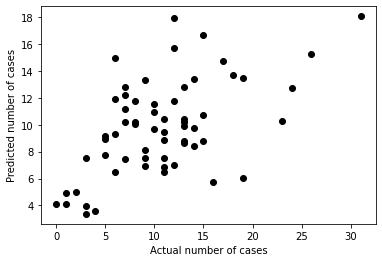

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Y_pred = mlr_predict( X_test, w )

plt.scatter(Y_test,Y_pred,color='black')
plt.xlabel('Actual number of cases')
plt.ylabel('Predicted number of cases')

In [38]:
print('Root mean-square error:',np.sqrt(np.sum((Y_pred - Y_test)**2)/Y_pred.shape[0]))

Root mean-square error: 5.091704165554276


**NOTE:** The answers here may vary slightly from one machine to another depending on how the data is divided into training and test sets. 